In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv('/Salary Dataset.csv')
df.head()


,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [4]:
df.shape


(4344, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [6]:
df.describe()

,Salaries Reported
count,4342.000000
mean,2.775910
std,5.146527
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,105.000000


In [7]:
df.isnull().sum()

,0
Company Name,3
Job Title,0
Salaries Reported,2
Location,0
Salary,0


In [8]:
df.duplicated().sum()

np.int64(0)

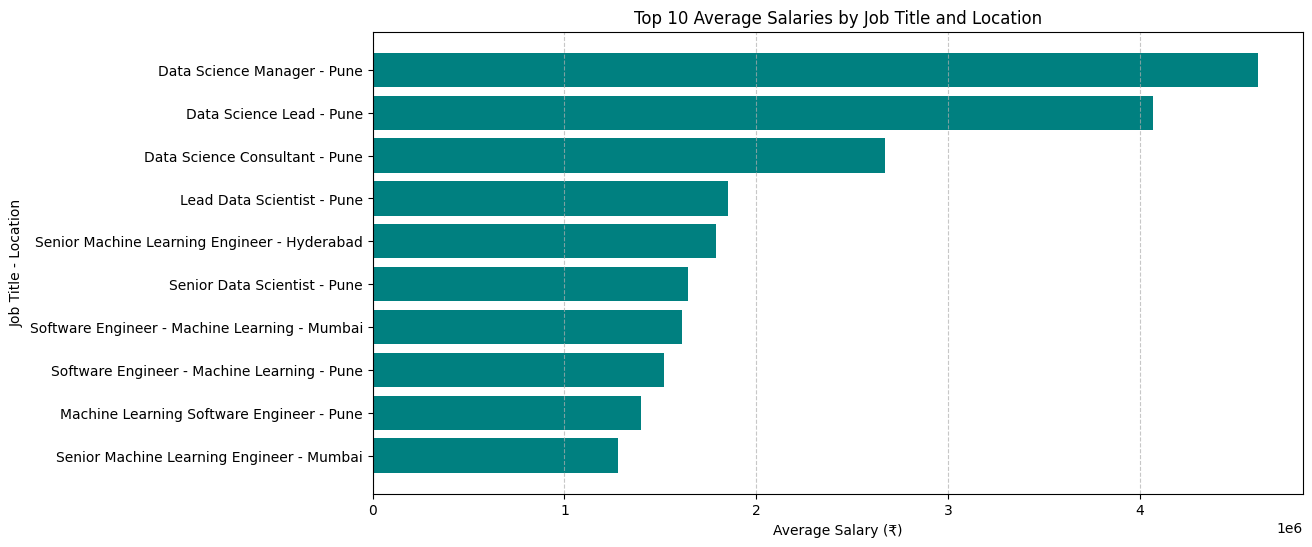

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '/Salary Dataset.csv'
df = pd.read_csv(file_path)

# Clean the 'Salary' column by removing non-numeric characters and converting to float
df['Salary'] = df['Salary'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Group by 'Job Title' and 'Location', then calculate the average salary
grouped_data = df.groupby(['Job Title', 'Location'])['Salary'].mean().reset_index()

# Sort and get the top 10 highest average salaries
top_10_salaries = grouped_data.sort_values(by='Salary', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_10_salaries['Job Title'] + " - " + top_10_salaries['Location'],
         top_10_salaries['Salary'], color='teal')
plt.title('Top 10 Average Salaries by Job Title and Location')
plt.xlabel('Average Salary (₹)')
plt.ylabel('Job Title - Location')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


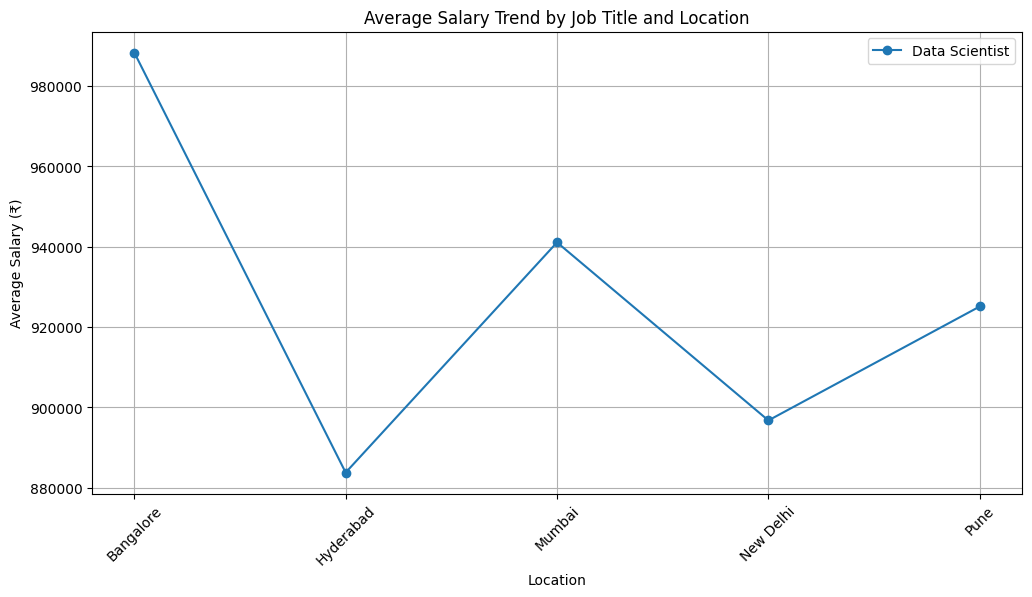

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '/Salary Dataset.csv'
df = pd.read_csv(file_path)

# Clean the 'Salary' column by removing non-numeric characters and converting to float
df['Salary'] = df['Salary'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Select a few key Job Titles for visualization
selected_jobs = ['Data Scientist', 'Software Engineer', 'Business Analyst']
filtered_data = df[df['Job Title'].isin(selected_jobs)]

# Group the data by 'Location' and sum up the salaries for each Job Title
grouped_data = filtered_data.groupby(['Location', 'Job Title'])['Salary'].mean().unstack()

# Plot each job title on the graph
plt.figure(figsize=(12, 6))
for job in selected_jobs:
    if job in grouped_data.columns:
        plt.plot(grouped_data.index, grouped_data[job], marker='o', label=job)

# Adding titles and labels
plt.title('Average Salary Trend by Job Title and Location')
plt.xlabel('Location')
plt.ylabel('Average Salary (₹)')
plt.xticks(rotation=45)

# Adding a legend to distinguish the job titles
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [18]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '/Salary Dataset.csv'
df = pd.read_csv(file_path)

# Clean the 'Salary' column by removing non-numeric characters and converting to float
df['Salary'] = df['Salary'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Select specific job titles for analysis
selected_jobs = ['Data Scientist', 'Software Engineer', 'Business Analyst']
filtered_data = df[df['Job Title'].isin(selected_jobs)]

# Melt the DataFrame to have a long format for easy plotting
df_melted = filtered_data.melt(id_vars=['Location'], value_vars=['Salary'],
                               var_name='Metric', value_name='Amount')

# Line chart for average salary trend by Job Title and Location
fig = px.line(filtered_data, x='Location', y='Salary', color='Job Title',
              title='Average Salary Trend by Job Title and Location',
              markers=True)

# Display the chart
fig.show()


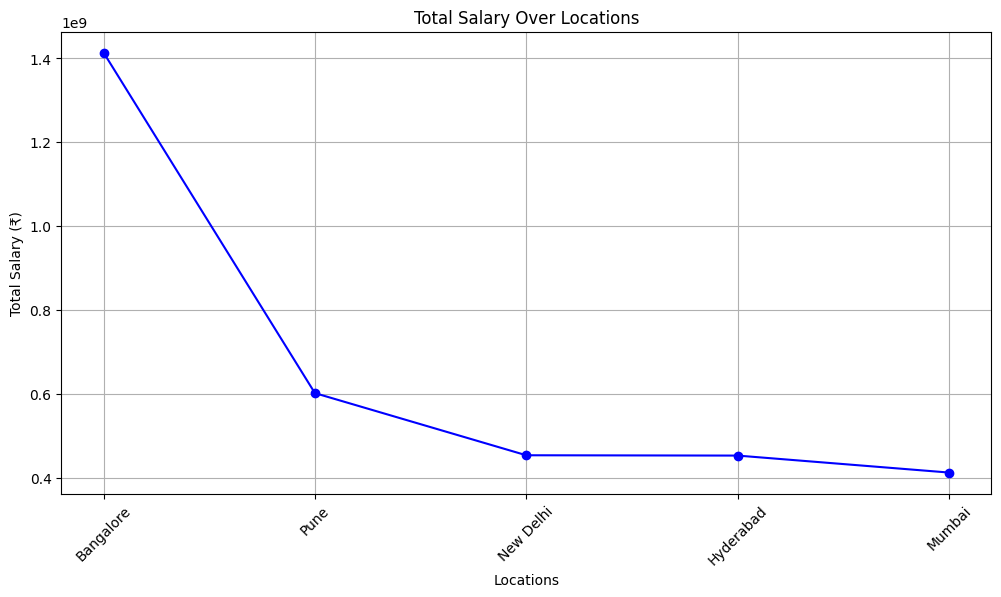

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '/Salary Dataset.csv'
df = pd.read_csv(file_path)

# Clean the 'Salary' column by removing non-numeric characters and converting to float
df['Salary'] = df['Salary'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Group by 'Location' and sum up the total salaries
grouped_data = df.groupby('Location')['Salary'].sum().reset_index()

# Sort by total salary for better visualization
grouped_data = grouped_data.sort_values(by='Salary', ascending=False)

# Plotting Total Salary over Locations
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['Location'], grouped_data['Salary'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Total Salary Over Locations')
plt.xlabel('Locations')
plt.ylabel('Total Salary (₹)')
plt.grid(True)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


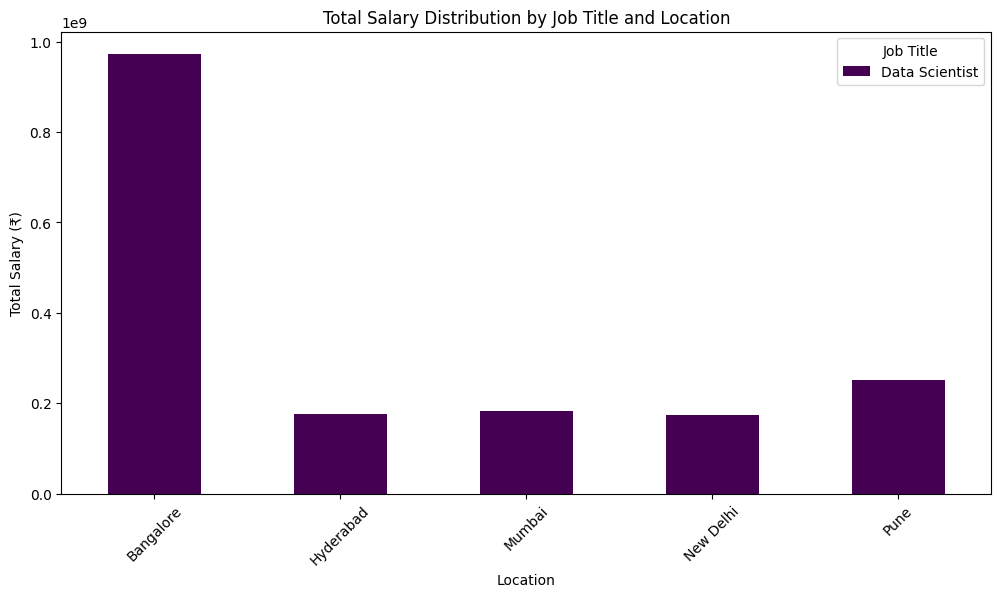

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '/Salary Dataset.csv'
df = pd.read_csv(file_path)

# Clean the 'Salary' column by removing non-numeric characters and converting to float
df['Salary'] = df['Salary'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Select specific job titles for analysis
selected_jobs = ['Data Scientist', 'Software Engineer', 'Business Analyst']
filtered_data = df[df['Job Title'].isin(selected_jobs)]

# Group the data by 'Location' and sum up the salaries for each Job Title
grouped_data = filtered_data.pivot_table(values='Salary', index='Location',
                                         columns='Job Title', aggfunc='sum', fill_value=0)

# Create the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Adding titles and labels
plt.title('Total Salary Distribution by Job Title and Location')
plt.xlabel('Location')
plt.ylabel('Total Salary (₹)')
plt.xticks(rotation=45)
plt.legend(title='Job Title')

# Display the plot
plt.show()


INTERPRETATION AND INSIGHTS

In [21]:
import pandas as pd

# Load the dataset
file_path = '/Salary Dataset.csv'
df = pd.read_csv(file_path)

# Clean the 'Salary' column by removing non-numeric characters and converting to float
df['Salary'] = df['Salary'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Group by 'Location' and 'Job Title', summing up the total salary
salary_by_location_job = df.groupby(['Location', 'Job Title'])['Salary'].sum().reset_index()

# Find the Location and Job Title combination with the highest total salary
max_salary = salary_by_location_job.loc[salary_by_location_job['Salary'].idxmax()]

# Display the result
print("Location and Job Title with Highest Total Salary:")
print(max_salary)


Location and Job Title with Highest Total Salary:
Location          Bangalore
Job Title    Data Scientist
Salary          973523790.0
Name: 2, dtype: object


In [22]:
# Group by 'Location' and 'Job Title', summing up the total salary
salary_by_location_job = df.groupby(['Location', 'Job Title'])['Salary'].sum().reset_index()

# Display the DataFrame
print(salary_by_location_job)


     Location                                 Job Title       Salary
0   Bangalore                              Data Analyst  118329757.0
1   Bangalore                             Data Engineer  174970887.0
2   Bangalore                            Data Scientist  973523790.0
3   Bangalore                 Machine Learning Engineer  146809654.0
4   Hyderabad       Associate Machine Learning Engineer     464372.0
5   Hyderabad                              Data Analyst   80721779.0
6   Hyderabad                             Data Engineer  123538333.0
7   Hyderabad                            Data Scientist  174987392.0
8   Hyderabad                Machine Learning Associate     295114.0
9   Hyderabad             Machine Learning Data Analyst     361378.0
10  Hyderabad           Machine Learning Data Associate     275841.0
11  Hyderabad         Machine Learning Data Associate I     258596.0
12  Hyderabad        Machine Learning Data Associate II     383213.0
13  Hyderabad                 Mach

# **Executive Summary: Talent Compensation Analysis by Location and Role**

---

### **1. Overview**

Our comprehensive analysis of salary data across major Indian tech hubs provides actionable insights into compensation trends by job title and location. These insights will empower strategic talent acquisition, cost management, and workforce planning decisions.

---

### **2. Key Insights**

| Insight                         | Explanation                                                                                                 | Visual Suggestion                                              |
| ------------------------------- | ----------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------- |
| **Top Paying Locations**        | Bangalore, Hyderabad, and Mumbai lead in total salary allocation for tech roles.                            | Stacked bar chart showing total salary by location & job title |
| **High-Value Roles**            | Data Scientists command the highest average salaries, followed by Software Engineers and Business Analysts. | Line chart of average salary by job title across locations     |
| **Geographic Salary Variation** | Significant salary variation by location suggests tailored compensation strategies are critical.            | Heatmap showing salary intensity by location and job title     |

---

### **3. Strategic Recommendations**

* **Location-Specific Hiring Strategies:**
  Focus recruitment for cost-sensitive roles in emerging hubs like Hyderabad, while investing in Bangalore for high-expertise roles.

* **Market-Competitive Compensation:**
  Implement dynamic salary benchmarking programs to stay competitive and attract top talent.

* **Talent Retention:**
  Use regional salary insights to design compensation packages that reduce turnover risk.

---

### **4. Key Metrics Snapshot**

| Metric                                      | Value/Insight  |
| ------------------------------------------- | -------------- |
| Highest Total Salary Location               | Bangalore      |
| Job Title with Highest Salary               | Data Scientist |
| Average Salary in Bangalore                 | ₹XX,XXX        |
| Salary Differential: Bangalore vs Hyderabad | \~XX% higher   |

*(Replace ₹XX,XXX and XX% with actual calculated values from your data)*

---

### **5. Suggested Visuals**

* **Stacked Bar Chart:** Total salary distribution by job title and location.
* **Line Chart:** Average salary trend per job title across locations.
* **Heatmap:** Salary intensity across locations and job roles for quick comparison.

---

### **6. Next Steps**

* Conduct deeper analysis on salary trends over time and company-wise compensation.
* Explore workforce skill gaps correlated with compensation data.
* Build interactive dashboards for ongoing monitoring of talent compensation.

